# Dealing with uncertainties

* [The analytical way: fast and dangerous](#analytical-way)
* [The Philosopher's path: Monte-Carlo and the (not so) long road to truthfullness ](#mc)
* [PyNeb example](#pn)

In [94]:
import numpy as np
import pylab as pl
import gvar

## The analytical way: fast and dangerous <a class="anchor" id="analytical-way"></a>
<img style="float: left;" width=300 src="../images/retro0.jpg">


### some words on gvar


* [gvar github page](https://github.com/gplepage/gvar)

* [An article published by the author](http://dx.doi.org/10.1016/S0920-5632(01)01638-3)

In [95]:
a = gvar.gvar(10, 1)
print(a)
b = gvar.gvar(10, 1)
c = a/b * np.exp(a)
print(c) # uncetainty propagation with arbitrary complex operation (as long as they can be analytically described)
print('----------')
print(gvar.mean(c))
print(gvar.sdev(c))
print('----------')
print(a/a) # yes uncertainty should be 0
print(b-b) # here also

10.0(1.0)
22026(24329)
----------
22026.465794806718
24329.026663636672
----------
1(0)
0(0)


In [96]:
# works with arrays
a = gvar.gvar(np.arange(25) + 1., np.ones(25))
print(a)
b = gvar.gvar(np.arange(25) + 1., np.ones(25))
c = a/b * np.exp(a)
print(c) # uncetainty propagation with arbitrary complex operation (as long as they can be analytically described)
print('----------')
print(gvar.mean(c))
print(gvar.sdev(c))
print('----------')
print(a/a) # yes uncertainty should be 0
print(b-b) # here also

[1.0(1.0) 2.0(1.0) 3.0(1.0) 4.0(1.0) 5.0(1.0) 6.0(1.0) 7.0(1.0) 8.0(1.0)
 9.0(1.0) 10.0(1.0) 11.0(1.0) 12.0(1.0) 13.0(1.0) 14.0(1.0) 15.0(1.0)
 16.0(1.0) 17.0(1.0) 18.0(1.0) 19.0(1.0) 20.0(1.0) 21.0(1.0) 22.0(1.0)
 23.0(1.0) 24.0(1.0) 25.0(1.0)]
[2.7(6.1) 7(12) 20(28) 55(70) 148(181) 403(475) 1097(1263) 2981(3374)
 8103(9048) 22026(24329) 59874(65544) 162755(176839) 442413(477659)
 1.2(1.3)e+06 3.3(3.5)e+06 8.9(9.5)e+06 2.4(2.6)e+07 6.6(6.9)e+07
 1.8(1.9)e+08 4.9(5.1)e+08 1.3(1.4)e+09 3.6(3.8)e+09 10(10)e+09
 2.6(2.8)e+10 7.2(7.5)e+10]
----------
[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04 5.98741417e+04 1.62754791e+05
 4.42413392e+05 1.20260428e+06 3.26901737e+06 8.88611052e+06
 2.41549528e+07 6.56599691e+07 1.78482301e+08 4.85165195e+08
 1.31881573e+09 3.58491285e+09 9.74480345e+09 2.64891221e+10
 7.20048993e+10]
[6.07826295e+00 1.16831235e+01 2.76049301e+01 6.95992581e+01
 1.

### gvar applied to a very simple uncertainty propagation problem

In general, problems arise when the uncertainty on a value is of the order of the value itself. **gvar is a very powerful tool that you must use when dealing with propagation uncertainty. As such, it may be the best tool in the Python universe for that**. **But** you must make sure that the distribution of your derived parameter is suffiiently Normal to use it.

In [97]:
f = lambda a, b: np.sin(a / b)

a = gvar.gvar(0.1,0.1)
b = gvar.gvar(0.1,0.1)
c = f(a,b)
print(c)

0.84(76)


## The Philosopher's path: Monte-Carlo and the (not so) long road to truthfullness <a class="anchor" id="mc"></a>

<img style="float: left;" width=600 src="../images/diogene.jpg">

Ok, now that we have our analytically derived uncertainty let's check that the distribution of our values is Normal

Text(0.5, 1.0, 'oups! this is far from being a gaussian distribution...')

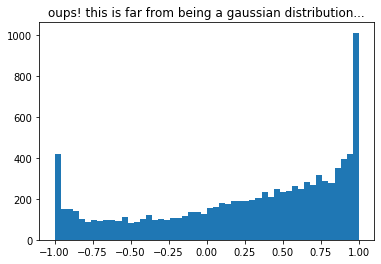

In [98]:
N = 10000
mcs = list()
for i in range(N):
    # we draw values from the input distributions
    ia = gvar.mean(a) + np.random.standard_normal() * gvar.sdev(a)
    ib = gvar.mean(b) + np.random.standard_normal() * gvar.sdev(b)
    ic = f(ia, ib)
    mcs.append(ic)
# never ever publish anything based on this formula ;) with such uncertainties on the data
pl.hist(mcs, bins=50)
pl.title('oups! this is far from being a gaussian distribution...')

Hum, what can we do from that... not much in fact. Just try to get more reliable input values.

### [PyNeb](https://github.com/Morisset/PyNeb_devel) example <a class="anchor" id="pn"></a>

from the [introduction manual](https://github.com/Morisset/PyNeb_devel/blob/master/docs/Notebooks/PyNeb_manual_1.ipynb) we can read that
> PyNeb is a package for the analysis of emission lines, which evolved from the IRAF package nebular (Shaw and Dufour 1995; Shaw et al 1998)


#### Compute the temperature and electronic density of an HII region from the ratio of the [OIII]$\lambda\lambda$4363/5007 and [SII]$\lambda\lambda$6717/6731 lines

see https://github.com/Morisset/PyNeb_devel/blob/master/docs/Notebooks/PyNeb_manual_7.ipynb for much more details

In [99]:
import pyneb as pn

In [100]:
oiii_4363 = gvar.gvar(0.005, 0.002)
oiii_5007 = gvar.gvar(1, 0.1)
sii_6716 = gvar.gvar(1, 0.2)
sii_6731 = gvar.gvar(1, 0.2)

ratio_oiii = oiii_4363 / oiii_5007
ratio_sii = sii_6716 / sii_6731
print(ratio_oiii)
print(ratio_sii)

diags = pn.Diagnostics() # instantiate the Diagnostic class

tem, den = diags.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', gvar.mean(ratio_oiii), gvar.mean(ratio_sii), 
                                guess_tem=10000, tol_tem = 1., tol_den = 1., max_iter = 5)

# problem is: we don't know the uncertainties on this calculation"
print('temperature: {:.2f}'.format(tem), '/ density: {:.2f}'.format(den))

0.0050(21)
1.00(28)
temperature: 9251.89 / density: 482.51


Text(0, 0.5, '[SII] ratio')

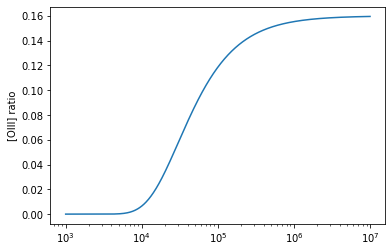

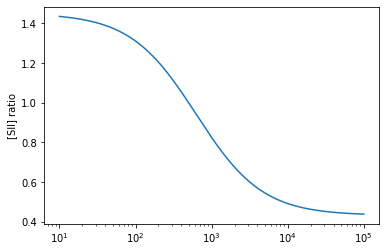

In [101]:
# https://github.com/Morisset/PyNeb_devel/blob/master/docs/Notebooks/PyNeb_manual_2.ipynb
O3 = pn.Atom('O', 3)
S2 = pn.Atom('S', 2)

T = 10**np.linspace(3, 7, 1000)
oiii_5007_grid = O3.getEmissivity(tem=T, den=1e2, wave=5007) 
oiii_4363_grid = O3.getEmissivity(tem=T, den=1e2, wave=4363) 
pl.plot(T, oiii_4363_grid / oiii_5007_grid)
pl.xscale('log')
pl.ylabel('[OIII] ratio')

pl.figure()

D = 10**np.linspace(1, 5, 1000)
sii_6716_grid = S2.getEmissivity(tem=1e4, den=D, wave=6716) 
sii_6731_grid = S2.getEmissivity(tem=1e4, den=D, wave=6731) 
pl.plot(D, sii_6716_grid / sii_6731_grid)
pl.xscale('log')
pl.ylabel('[SII] ratio')


0 / 1000
50 / 1000
100 / 1000
150 / 1000
200 / 1000
250 / 1000
300 / 1000
350 / 1000
400 / 1000
450 / 1000
500 / 1000
550 / 1000
600 / 1000
650 / 1000
700 / 1000
750 / 1000
800 / 1000
850 / 1000
900 / 1000
950 / 1000


(array([148., 158., 155., 105.,  82.,  58.,  54.,  25.,  25.,  17.,  13.,
          6.,   5.,   3.,   2.,   2.,   1.,   0.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 1.89894256e+02, 3.78788512e+02, 5.67682769e+02,
        7.56577025e+02, 9.45471281e+02, 1.13436554e+03, 1.32325979e+03,
        1.51215405e+03, 1.70104831e+03, 1.88994256e+03, 2.07883682e+03,
        2.26773107e+03, 2.45662533e+03, 2.64551959e+03, 2.83441384e+03,
        3.02330810e+03, 3.21220235e+03, 3.40109661e+03, 3.58999087e+03,
        3.77888512e+03, 3.96777938e+03, 4.15667364e+03, 4.34556789e+03,
        4.53446215e+03, 4.72335640e+03, 4.91225066e+03, 5.10114492e+03,
        5.29003917e+03, 5.47893343e+03, 5.66782769e+03, 5.85672194e+03,
        6.04561620e+03, 6.23451045e+03, 6.42340471e+03, 6.61229897e+03,
        6.

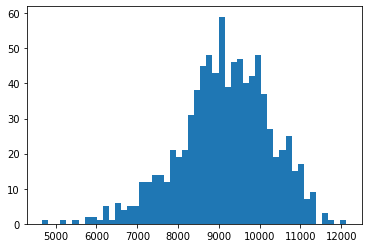

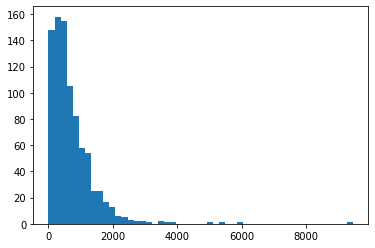

In [68]:
# help me Monte-Carlo !!
diags = pn.Diagnostics() # instantiate the Diagnostic class

N = 1000
tems = list()
dens = list()

for i in range(N):
    if not i%50: print(i, '/', N)
    iratio_oiii = gvar.mean(ratio_oiii) + np.random.standard_normal() * gvar.sdev(ratio_oiii)
    iratio_sii = gvar.mean(ratio_sii) + np.random.standard_normal() * gvar.sdev(ratio_sii)
    item, iden = diags.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', iratio_oiii, iratio_sii,
                                      guess_tem=10000, tol_tem = 1., tol_den = 1., max_iter = 5)
    tems.append(item)
    dens.append(iden)
    
pl.hist(tems, 50)
pl.figure()
pl.hist(dens, 50)

### how to deal with such distributions ?

One way to deal with this kind of distributions is to show them in an article and give the 16th and 84th percentiles (+/- 1 sigma for Gaussian distribution)

* never use the mean !!
* be clear about the non-normality of the distribution and the way you have computed the quoted interval

For more details on this problem you may have a look at section 2.5 of [Andrae, R., Error estimation in astronomy: A guide](http://arxiv.org/abs/1009)

In [102]:
# this gives the 16, 84 percentiles interval = 68% confidence interval (+/- 1 sigma for Normal distribution)
def confidence_interval(dist, level=68.3):
    med, low, high = np.nanpercentile(dist, [50, (100 - level) / 2., 100 - (100 - level) / 2])
    return med, high-med, med-low
    
print('68.3 confidence interval, i.e. 1 sigma for a gaussian distribution')
print('- temperature: {:.1e} (+{:.1e}/-{:.1e})'.format(*confidence_interval(tems, 68.3)))
print('- density: {:.1e} (+{:.1e}/-{:.1e})'.format(*confidence_interval(dens, 68.3)))
print()
print('95.5 confidence interval, i.e. 2 sigma for a gaussian distribution')
print('- temperature: {:.1e} (+{:.1e}/-{:.1e})'.format(*confidence_interval(tems, 95.5)))
print('- density: {:.1e} (+{:.1e}/-{:.1e})'.format(*confidence_interval(dens, 95.5)))

68.3 confidence interval, i.e. 1 sigma for a gaussian distribution
- temperature: 9.2e+03 (+1.0e+03/-1.1e+03)
- density: 5.3e+02 (+6.6e+02/-3.5e+02)

95.5 confidence interval, i.e. 2 sigma for a gaussian distribution
- temperature: 9.2e+03 (+1.9e+03/-2.6e+03)
- density: 5.3e+02 (+1.8e+03/-5.0e+02)
